

## ARIMA (AutoRegressive Integrated Moving Average)

* Used to understand data and forecast future values
* It works well when data does not depend on external factors 
* Several models (ARIMA, SARIMA, SARIMAX)
* "Integrated" part of the model helps to manage non-stationary data

#### ARIMA(p,d,q)
* AR(p) : Autoregration model that exploits relationship between the current observation and the previous ones over a given period (and a stochastic, not predictable term)
* I(d) : differencing process
* MA(q) : it exploits dependency between the current observation and the residual error from a moving average model applied to q lagged observations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


ts = pd.read_csv('./data2.csv', header=0, parse_dates=[0], dayfirst=True, index_col=0)
tsr = ts.resample(rule='20T').mean()

<AxesSubplot: xlabel='Time'>

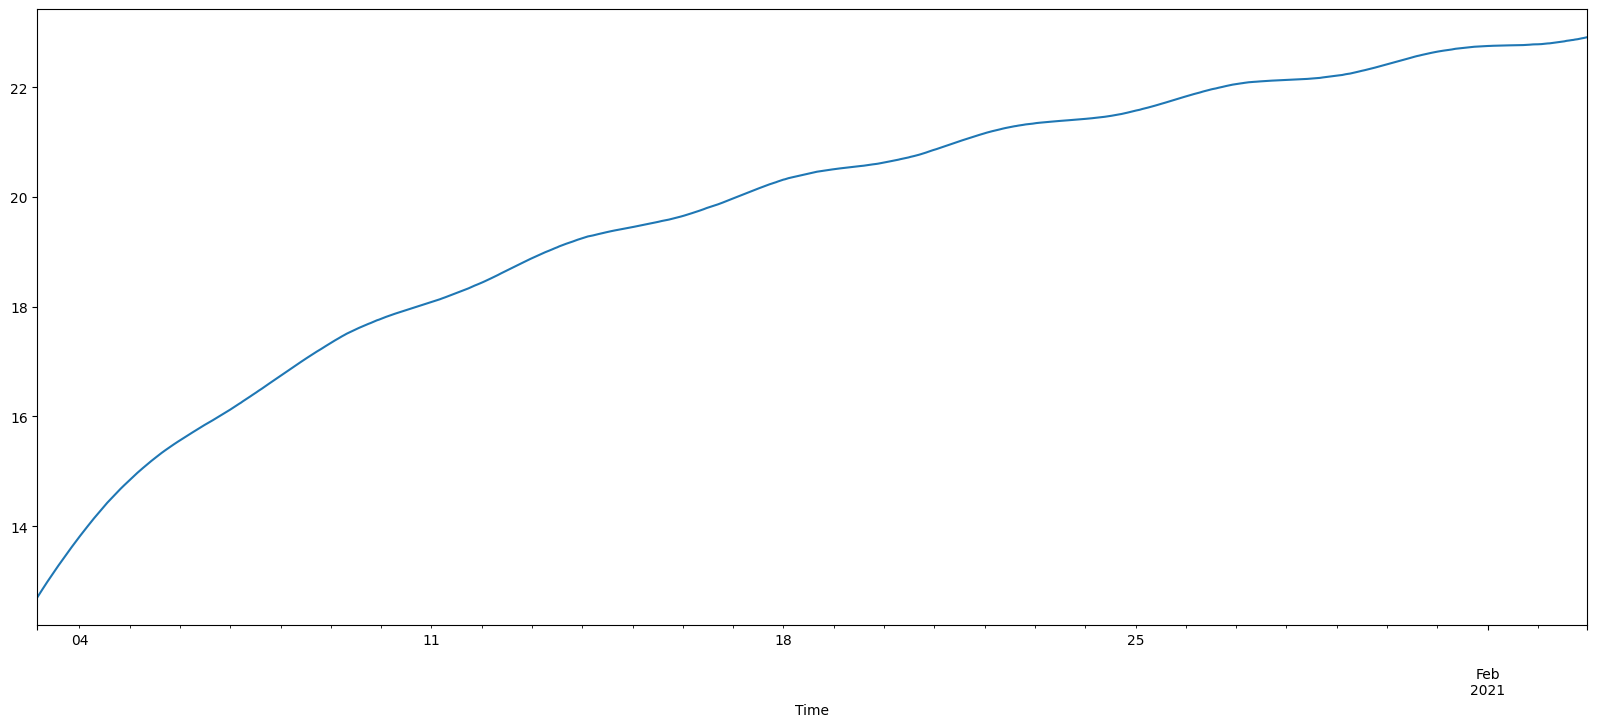

In [2]:
# try to predict trend: Extract TREND
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tsr, model='additive', period=310)  
trend = result.trend.dropna()
trend.plot(figsize=(20,8))

In [3]:
#Check stationarity (p_value < 0.05)
from statsmodels.tsa.stattools import adfuller
adft = adfuller(trend,autolag='AIC')

#print them with info
print('Augmented Dickey-Fuller Test Results')

out = pd.Series(adft[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in adft[4].items():
    out[f'critical value ({key})']=val
print(out)

Augmented Dickey-Fuller Test Results
ADF test statistic        -2.180971
p-value                    0.213224
# lags used               26.000000
# observations          2193.000000
critical value (1%)       -3.433335
critical value (5%)       -2.862859
critical value (10%)      -2.567472
dtype: float64


<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

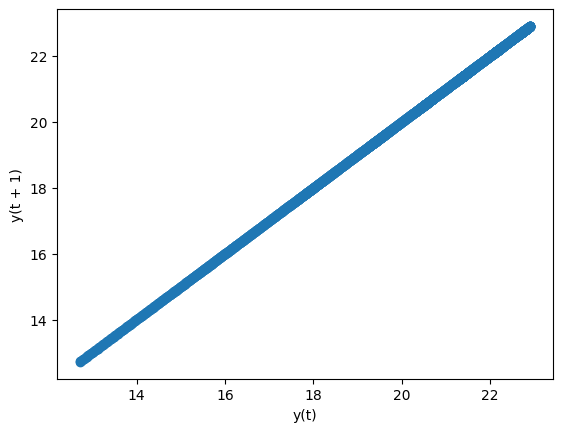

In [4]:
#Lags plot
from pandas.plotting import lag_plot

lag_plot(trend)  #check resid, seasonal

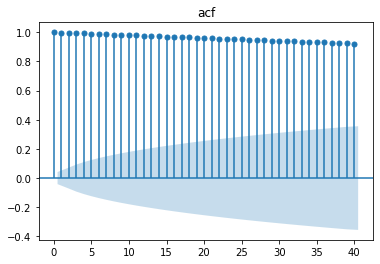

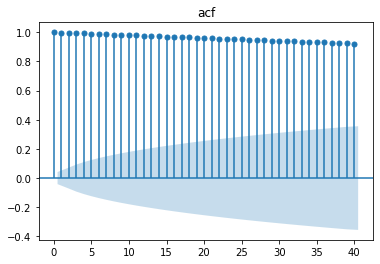

In [84]:
plot_acf(trend,title='acf',lags=40)

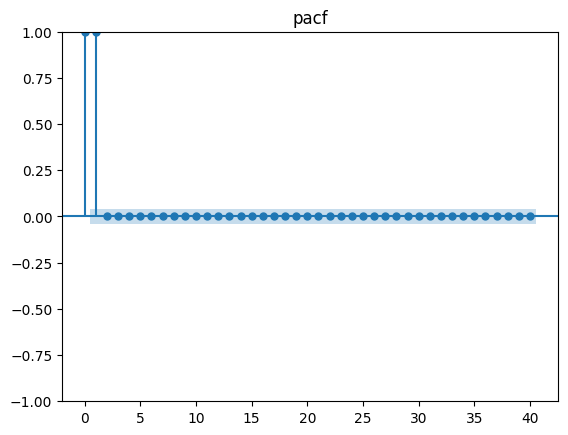

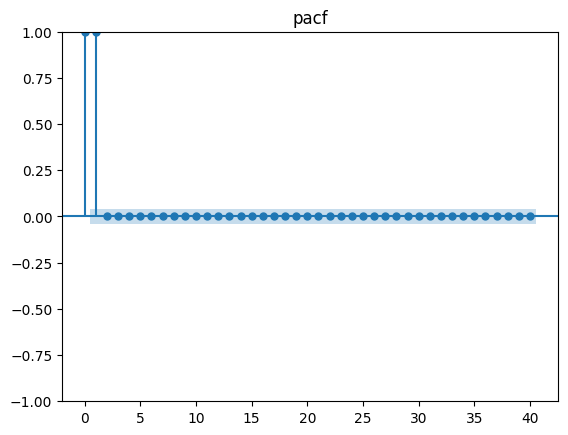

In [5]:
plot_pacf(trend,title='pacf',lags=40)

If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms.

In [6]:
auto_arima(trend)
#Note: auto_arima(seasonal,seasonal=True,m=320).summary()

ARIMA(order=(3, 2, 5), scoring_args={}, suppress_warnings=True)

In [7]:
trend.describe()

count    2220.000000
mean       19.726251
std         2.574879
min        12.708383
25%        18.047135
50%        20.444403
75%        21.905195
max        22.913663
Name: trend, dtype: float64

In [8]:
train = trend.iloc[:2000]
test = trend.iloc[2000:]

In [9]:
model = ARIMA(train, order=(3,2,5))
#note: model = SARIMAX(train,order=(0,1,3),seasonal_order=(1,0,1,320))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [91]:
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.52734D+00    |proj g|=  1.36765D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     43      2     0     0   3.114D-01  -6.527D+00
  F =  -6.5273418002177070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [92]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.trend   No. Observations:                 1998
Model:                 ARIMA(3, 2, 5)   Log Likelihood               13041.629
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 22 Dec 2021   AIC                         -26063.258
Time:                        11:18:13   BIC                         -26007.259
Sample:                    01-03-2021   HQIC                        -26042.695
                         - 01-30-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.551e-06    2.1e-06     -4.072      0.000   -1.27e-05   -4.43e-06
ar.L1.D2.trend     0.2013        nan        nan        nan         nan         nan
ar.L2.D2.trend    -0.2762        nan        nan        nan         nan         nan
ar.L3.D2.trend     0.0985        nan        nan        nan         nan         nan
ma.L1.D2.trend    -0.1659        nan        nan        nan         nan         nan
ma.L2.D2.trend    -0.6073        nan        nan        nan         nan         nan
ma.L3.D2.trend     0.1156        nan        nan        nan         nan         nan
ma.L4.D2.trend    -0.2346        nan        nan        nan         nan         nan
ma.L5.D2.trend     0.1507        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1827           -1.7803j            1.7897           -0.2663
AR.2           -0.1827           +1.7803j            1.7897            0.2663
AR.3            3.1707           -0.0000j            3.1707           -0.0000
MA.1           -1.0182           -0.0000j            1.0182           -0.5000
MA.2           -0.2777           -1.6507j            1.6739           -0.2765
MA.3           -0.2777           +1.6507j            1.6739            0.2765
MA.4            1.2125           -0.0000j            1.2125           -0.0000
MA.5            1.9177           -0.0000j            1.9177           -0.0000
-----------------------------------------------------------------------------
"""

In [93]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

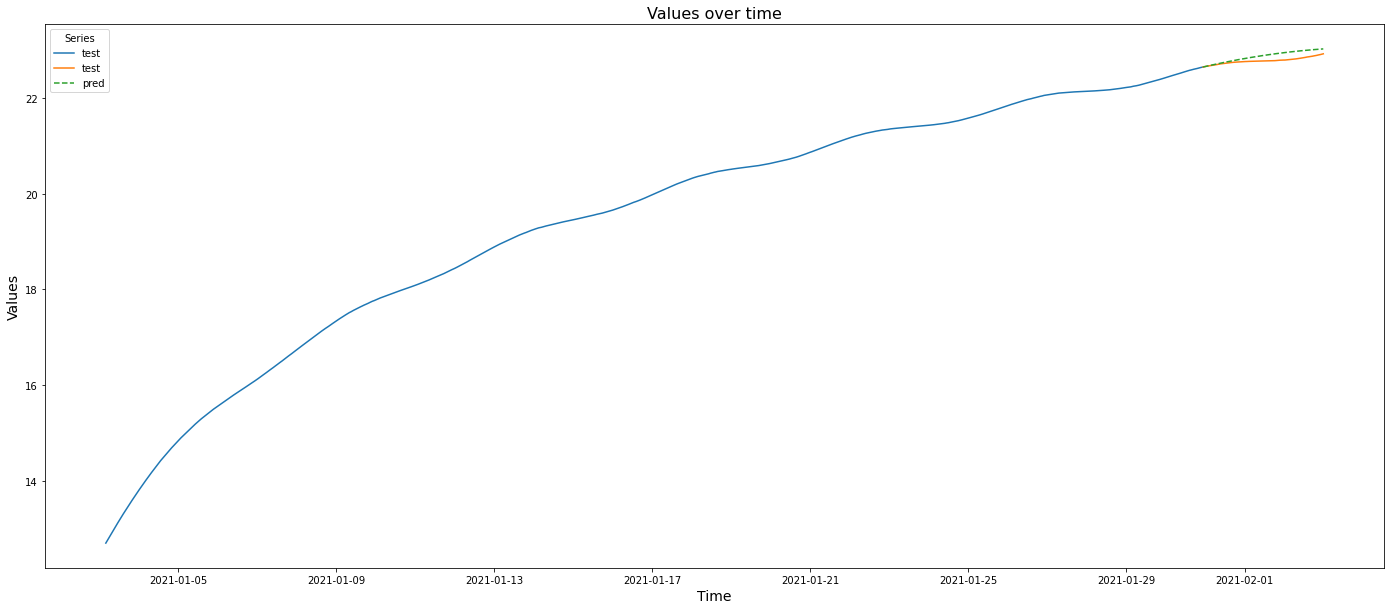

In [94]:
#define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(train,"-", label = 'test')
plt.plot(test,"-", label = 'test')
plt.plot(predictions,"--", label = 'pred')
#add legend
plt.legend(title='Series')

In [95]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test, predictions)
error

0.011623062370114507

In [96]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test, predictions)
error

0.10781030734635026

In [97]:
trend.describe()

count    2220.000000
mean       19.726251
std         2.574879
min        12.708383
25%        18.047135
50%        20.444403
75%        21.905195
max        22.913663
Name: trend, dtype: float64

In [98]:
model = ARIMA(trend,order=(3,2,5))
results = model.fit()
fcast = results.predict(len(trend),len(trend)+72,typ='levels')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.51832D+00    |proj g|=  8.99436D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     46      2     0     0   8.251D-02  -6.518D+00
  F =  -6.5183216797513674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


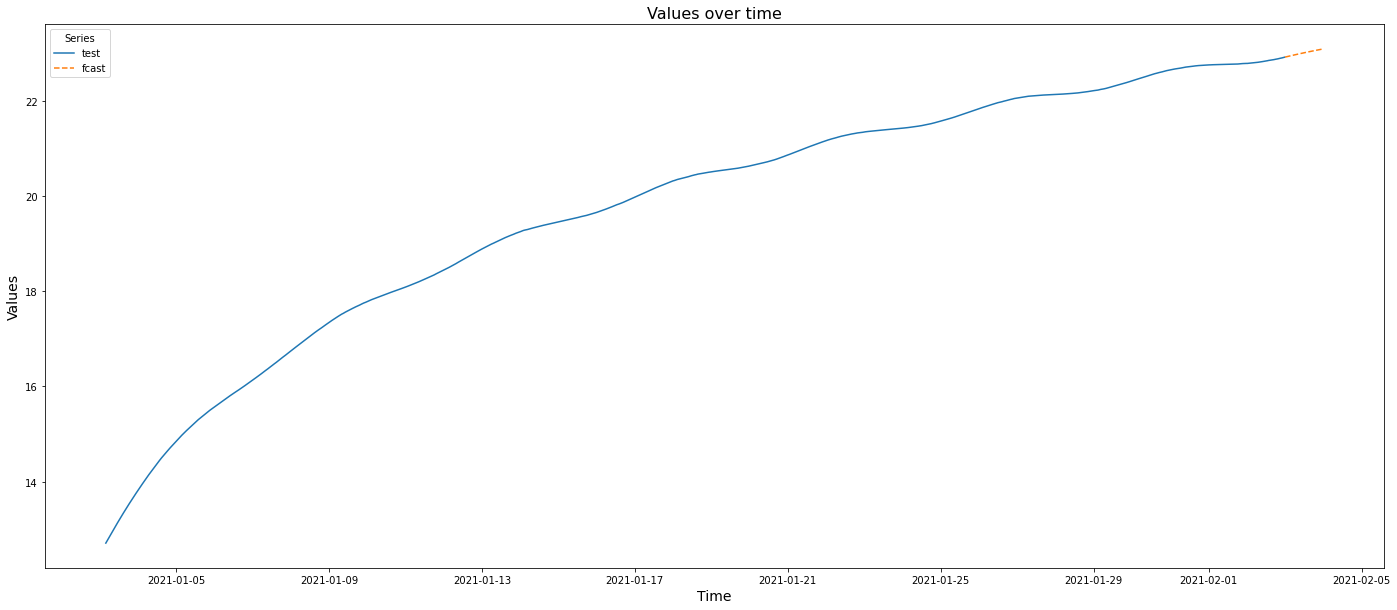

In [99]:
#define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(trend,"-", label = 'test')
plt.plot(fcast,"--", label = 'fcast')
#add legend
plt.legend(title='Series')